In [65]:
import pandas as pd
hr = pd.read_csv('train.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation_rating', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation_rating,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,3.8,5.3,3,167,3,0,1,0,sales,low
1,8.0,8.6,6,272,6,0,1,0,sales,medium
2,1.1,8.8,8,282,4,0,1,0,sales,medium
3,3.7,5.2,3,169,3,0,1,0,sales,low
4,4.1,5.0,3,163,3,0,1,0,sales,low


In [66]:

hr=hr.rename(columns = {'sales':'department'})
hr.dtypes


satisfaction_level        float64
last_evaluation_rating    float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
department                 object
salary                     object
dtype: object

In [67]:

hr.isnull().any()


satisfaction_level        False
last_evaluation_rating    False
number_project            False
average_montly_hours      False
time_spend_company        False
Work_accident             False
left                      False
promotion_last_5years     False
department                False
salary                    False
dtype: bool

In [68]:
hr.shape


(25491, 10)

In [69]:
hr.describe()

,satisfaction_level,last_evaluation_rating,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000
mean,6.137704,7.167832,4.215174,205.286846,3.497156,0.146012,0.234985,0.021419
std,2.486316,1.710754,1.324228,50.182916,1.457715,0.353125,0.423998,0.144780
min,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4.400000,5.600000,3.000000,160.000000,3.000000,0.000000,0.000000,0.000000
50%,6.500000,7.200000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000
75%,8.200000,8.700000,5.000000,249.000000,4.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,8.000000,320.000000,10.000000,1.000000,1.000000,1.000000


In [70]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [71]:

import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [72]:
print(hr['department'].unique())


['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


# Data Exploration

In [73]:
hr['left'].value_counts()

0    19501
1     5990
Name: left, dtype: int64

In [74]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation_rating,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,6.668899,7.159582,4.198041,203.199836,3.378647,0.176247,0.026665
1,4.408347,7.194691,4.270952,212.081302,3.882972,0.047579,0.004341


In [75]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation_rating,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,6.186966,7.095356,4.250936,204.902622,3.361049,0.173783,0.153558,0.034457
accounting,5.835790,7.193845,4.224924,205.725684,3.530395,0.127660,0.265957,0.018237
hr,6.037272,7.072720,4.078509,203.311657,3.357653,0.122125,0.283902,0.021412
management,6.218932,7.247423,4.262418,205.244611,4.299906,0.160262,0.134958,0.111528
marketing,6.200756,7.165430,4.087973,203.987629,3.578694,0.158763,0.229553,0.050172
product_mng,6.200727,7.185535,4.223910,203.686262,3.456407,0.149934,0.218626,0.000000
sales,6.164850,7.110125,4.183995,205.039581,3.541804,0.143984,0.240212,0.023519
technical,6.137237,7.212923,4.257805,206.091864,3.410974,0.145222,0.245317,0.008798


In [76]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation_rating,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,6.386124,7.049012,4.170743,203.784102,3.686736,0.153340,0.066792,0.060207
low,6.019963,7.180714,4.215674,205.429090,3.441506,0.144884,0.291945,0.008385
medium,6.222742,7.176300,4.223226,205.417351,3.523353,0.145868,0.203156,0.028644


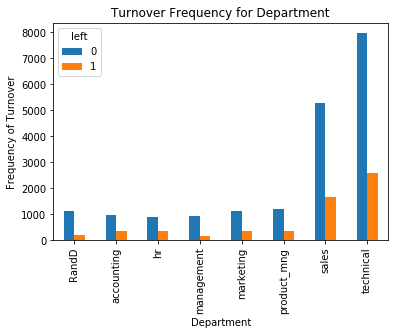

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

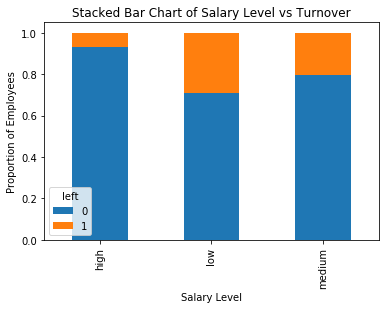

In [78]:
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [79]:
pd.crosstab(hr.department, hr.left)

left,0,1
department,,
RandD,1130,205
accounting,966,350
hr,903,358
management,923,144
marketing,1121,334
product_mng,1183,331
sales,5298,1675
technical,7977,2593


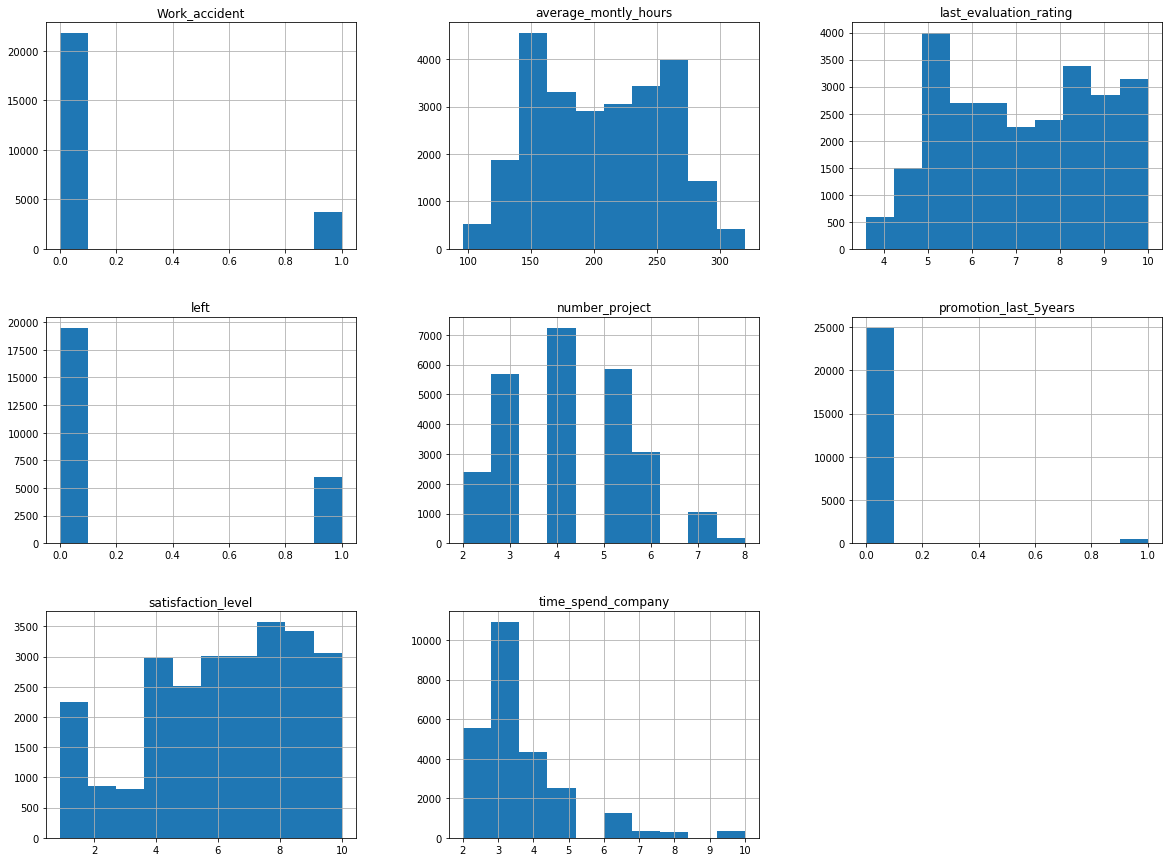

In [80]:
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

## Create Dummy Variable for Categorical Variable

There are two categorical variables in the dataset and they need to be converted to dummy variables before they can be used for modelling.

In [81]:
hr.head()

,satisfaction_level,last_evaluation_rating,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,3.8,5.3,3,167,3,0,1,0,sales,low
1,8.0,8.6,6,272,6,0,1,0,sales,medium
2,1.1,8.8,8,282,4,0,1,0,sales,medium
3,3.7,5.2,3,169,3,0,1,0,sales,low
4,4.1,5.0,3,163,3,0,1,0,sales,low


In [82]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

We drop the actual categorical variables once the dummy variables have been created.

In [83]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)

In [84]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation_rating', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [85]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [86]:
X

['satisfaction_level',
 'last_evaluation_rating',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [87]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True  True  True  True False  True  True False
 False False False  True  True  True]
[1 7 2 9 1 1 1 1 3 1 1 5 8 6 4 1 1 1]


In [89]:

cols=['satisfaction_level', 'last_evaluation_rating', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']

### Logistic Regression Model

In [90]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.767


### Random Forest

In [93]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.989


### Support Vector Machine

In [95]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.960


### 10 Fold Cross Validation

In [98]:
#For Random Forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for Random Forest Classifier: 0.988


In [99]:
#For SVM
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for SVM Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for SVM Classifier: 0.959


### Precision and Recall

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      5840
          1       0.98      0.98      0.98      1808

avg / total       0.99      0.99      0.99      7648



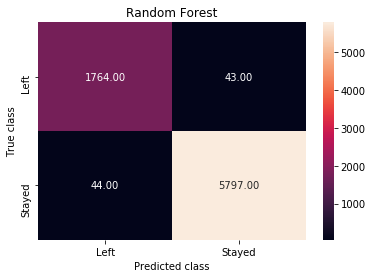

In [101]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [102]:
print(classification_report(y_test, logreg.predict(X_test)))

             precision    recall  f1-score   support

          0       0.80      0.92      0.86      5840
          1       0.51      0.26      0.34      1808

avg / total       0.73      0.77      0.74      7648



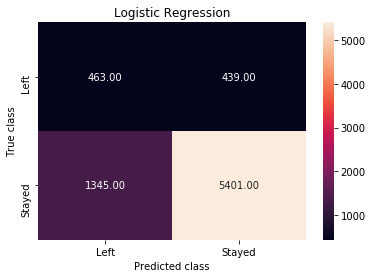

In [103]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [104]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      5840
          1       0.92      0.91      0.92      1808

avg / total       0.96      0.96      0.96      7648



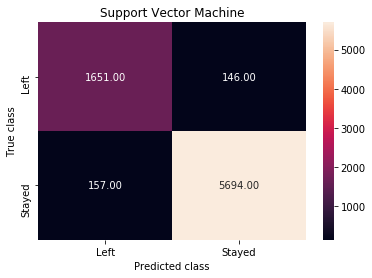

In [105]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

When an employee left, how often does the classifier predict that correctly? This measurement is called "recall" and a quick look at these diagrams can demonstrate that random forest is clearly best for this criteria. Out of all the turnover cases, random forest correctly retrieved 1764 out of 1808. This translates to a turnover "recall" of about 97.5% (1764/1808), far better than logistic regression (25.6%) or support vector machines (91.3%).

When a classifier predicts an employee will leave, how often does that employee actually leave? This measurement is called "precision". Random forest again out preforms the other two at about 97.6% precision (1764 out of 1807) with logistic regression at about 51.3% (463 out of 902), and support vector machine at about 91.8% (1651 out of 1797).

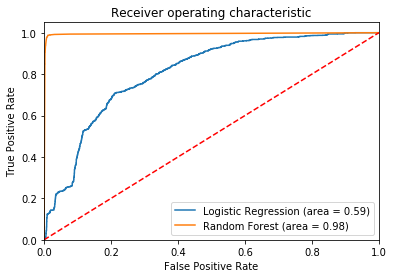

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

### Variable Imporatnce for Random Forest Classifier

In [109]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.15%
department_management-0.24%
department_hr-0.27%
department_RandD-0.30%
salary_high-0.73%
salary_low-0.79%
Work_accident-1.61%
last_evaluation-19.39%
time_spend_company-27.33%
satisfaction_level-49.19%
